In [ ]:
# Use 1D Convolutional Neural Network for text mining in IMDB( Internet Movie Database) to predicate sentimental analysis 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.datasets import imdb
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Load data 


In [ ]:
# Keras has this dataset built in, we can just load it. Also, the words have been replaced by integers  in the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Exploratory data analysis (EDA)

In [ ]:
# Join the dataset to see the shape of dataset
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)


In [ ]:
#print the shape of dataset. we can see the total is 50,000 rows
print("The shape of the dataset is: " )
print(X.shape)
print(y.shape)

The shape of the dataset is: 
(50000,)
(50000,)


In [ ]:
# Check unique class value. We can see that it is a binary classification problem for positive and negative sentiment in the movie review
print("Class:")
print(np.unique(y))

Class:
[0 1]


In [ ]:
# Check the the total number of unique words in the dataset. There are less 100,000 words used in whole dataset,
print(len(np.unique(np.hstack(X))))

88585


In [ ]:
#  we can get the average of the reveiw length and standard deviation, we can see the review length is below 500
review_len = [len(x) for x in X]
print("the mean and standard deviation are")
print(round(np.mean(review_len)), round(np.std(review_len)))

the mean and standard deviation are
235 173


In [ ]:
# Look at a value of  1st training example
print('Class:', y[0])

Class: 1


In [ ]:
print(X[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Get original text 
index = imdb.get_word_index()
index_reverse = dict([(value, key) for (key, value) in index.items()]) 
text = " ".join( [index_reverse.get(i - 3, "[]") for i in X[0]] )
print(text) 

1646592/1641221 [==============================] - 0s 0us/step
[] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile

In [ ]:
# Create a wordcloud object
wordcloud = WordCloud(width = 200, height = 200, background_color ='white',  min_font_size = 10).generate(text)

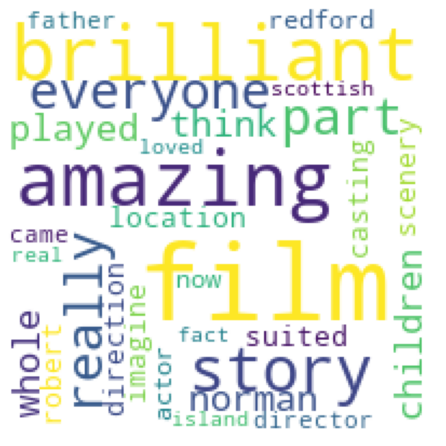

In [ ]:
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 


Data Preparation

In [ ]:
# Let's we are interested in only the first 10,000 word in dataset. So we can load dataset as below
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# We'll choose review length as 500 and trancate if longer that and pad with 0 if short than that
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


Define model


In [ ]:
#Define model
model = Sequential()


In [ ]:
# Add word embedding layer with 32 dimension vector to represent each word
model.add(Embedding(top_words, 32, input_length=max_words))

In [ ]:
# Addd 1D CNN layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [ ]:
# Add default Maxpooling
model.add(MaxPooling1D())

In [ ]:
# Add flatten  layer
model.add(Flatten())

In [ ]:
# Add densen layer 
model.add(Dense(250, activation='relu'))



In [ ]:
# Output -Layer
model.add(Dense(1, activation='sigmoid'))

Compile model

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Print model output 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               2000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 2,323,605
Trainable params: 2,323,605
Non-trainable params: 0
______________________________________________

Build and train the model


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 24s - loss: 0.4197 - accuracy: 0.7848 - val_loss: 0.2724 - val_accuracy: 0.8863
Epoch 2/2
196/196 - 23s - loss: 0.1827 - accuracy: 0.9310 - val_loss: 0.2949 - val_accuracy: 0.8817


Model evalution


In [ ]:
# Final evaluation of the model.  We can see that the model achieves the accuracy of above 88% 
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores[0])

Accuracy: 88.17%
0.29487571120262146


In [ ]:
# predict test set
#yhat = model.predict_classes(X_test)

In [ ]:
# evaluate predictions
#score = accuracy_score(y_test, yhat)
#print('Accuracy: %.3f' % score)